## Procedure

- Where in my system is the SAS software?
> /Users/woodml/Code/XMM_SAS
- Where in my system are the Calibration files?
> /Users/woodml/Observing/XMM-Newton/Calibration
- Where is the XMM-Newton Observation data that I want to process?
> /Users/woodml/Observing/XMM-Newton/0671960101
- Which directory am I going to use to work with SAS?
> /Users/woodml/Observing/XMM-Newton/0671960101

## Initialization

Run the script \Users\woodml\Observing\XMM-Newton\initialize_sas.bash 

In [1]:
import sys, os
module_path = '/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python' # or the path to your source code
sys.path.insert(0, module_path)
%env SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735

from extraction_fcns import extract_lc, extract_spectrum, plot_LC, plot_region, plot_spectrum, rolling_median

from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
rcParams['font.weight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.linewidth'] = 1

from pysas.wrapper import Wrapper as wrap

env: SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735


In [2]:
wrap('sasver', []).run()


    XMM-Newton SAS - release and build information

    SAS release: xmmsas_20230412_1735-21.0.0
    Compiled on: Sun Apr 16 21:00:41 CEST 2023
    Compiled by: sasbuild@xmmm23.iuser.lan
    Platform   : macOS-12.6

    SAS-related environment variables set:

    
SAS_DIR        = /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
SAS_PATH       = /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
SAS_CCFPATH    = /Users/woodml/Observing/XMM-Newton/Calibration


<p style="text-align: justify;"><b>The output of <tt>sasver</tt> provides useful information on which version of SAS is being run and which SAS environment variables are defined.</b></p>

<p style="text-align: justify;"><u>Note</u>:It is important to always use [ ] when passing parameters to a task when using the wrapper, as parameters and options have to be passed in the form of a list. For example,  <tt>w('evselect', ['-h']).run()</tt>, will execute the SAS task <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/evselect/index.html"><tt>evselect</tt></a> with option -h. </p>

<p style="text-align: justify;">Should you define any new SAS environment variable, you can immediately check its existence by running again <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/sasver/index.html"><tt>sasver</tt></a>, as shown below as an example for the definition of the variable <tt>SAS_ODF</tt>,</p>

<p style="text-align: justify;">As explained in the help text shown here, if the task would have had any available parameters, we would get a listing of them immediately after the help text.</p>

<p style="text-align: justify;">As shown in the text above, the task <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/sasver/index.html"><tt>sasver</tt></a> has no parameters.</p>

<p style="text-align: justify;">You may try any other of the available options listed above to see how they behave when passed from the notebook.</p> 

In [12]:
work_dir = '/Users/woodml/Observing/XMM-Newton'

In [13]:
inargs = [f'odfid=0101440801',f'workdir={work_dir}']

<p style="text-align: justify;">Now, we execute <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html"><tt>startsas</tt></a> as described earlier. Any log information produced by the SAS tasks will appear in the terminal used to <i>initialize</i> SAS and start this notebook.</p>

In [14]:
wrap('startsas', inargs).run()

startsas - WARNING - Executing /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '0101440801', 'workdir': '/Users/woodml/Observing/XMM-Newton', 'sasfiles': 'no', 'sas_ccf': '', 'sas_odf': '', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}




        Starting SAS session
    
        Working directory = /Users/woodml/Observing/XMM-Newton
    
        
Requesting odfid  = 0101440801 to XMM-Newton Science Archive





Removing existing directory 0101440801 ...

Creating directory 0101440801 ...

Unpacking 0101440801.tar.gz ...

Unpacking 0327_0101440801.TAR ...

Setting SAS_ODF = /Users/woodml/Observing/XMM-Newton/0101440801

Running cifbuild...
cifbuild:- Executing (routine): cifbuild calindexset=ccf.cif ccfpath=. withccfpath=no usecanonicalname=no recurse=no fileglob=*.ccf|*.CCF fullpath=no observationdate=now withobservationdate=no analysisdate=now category=XMMCCF ignorecategory=no masterindex=no masterindexset=ccf.mif withmasterindexset=no append=no  -w 1 -V 4
cifbuild:- cifbuild (cifbuild-4.10.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-09T19:09:42.000
cifbuild:- Will ask the analysis date to the OAL.
cifbuild:- Using the ODF 0327_0101440801 found in /Users/woodml/Observing/XMM-Newton/0101440801
cifbuild:- Obse

odfingest:- M2/S002 start = 2001-09-21T01:34:20.000 end = 2001-09-22T13:34:31.000
odfingest:- M2/S002 start = 2001-09-21T01:34:20.000 end = 2001-09-22T13:34:31.000
odfingest:- R1/S004 start = 2001-09-21T01:27:54.000 end = 2001-09-22T13:29:28.000
odfingest:- R1/S004 start = 2001-09-21T01:27:54.000 end = 2001-09-22T13:29:28.000
odfingest:- R1/S900 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S900 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S901 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S901 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S902 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S902 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S903 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S903 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S

odfingest:- R1/S948 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S948 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S949 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S949 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S950 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S950 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S951 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S951 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S952 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S952 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S953 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S953 start = 2001-09-21T01:27:54.000 end = 2001-09-21T01:27:55.000
odfingest:- R1/S

odfingest:- OM/S006 start = 2001-09-21T05:12:47.000 end = 2001-09-21T05:13:06.000
odfingest:- OM/S006 start = 2001-09-21T05:12:47.000 end = 2001-09-21T05:13:06.000
odfingest:- OM/S007 start = 2001-09-21T01:51:09.000 end = 2001-09-21T02:57:49.000
odfingest:- OM/S007 start = 2001-09-21T01:51:09.000 end = 2001-09-21T02:57:49.000
odfingest:- OM/S008 start = 2001-09-21T09:01:21.000 end = 2001-09-21T10:08:02.000
odfingest:- OM/S008 start = 2001-09-21T09:01:21.000 end = 2001-09-21T10:08:02.000
odfingest:- OM/S009 start = 2001-09-21T05:38:57.000 end = 2001-09-21T06:45:37.000
odfingest:- OM/S009 start = 2001-09-21T05:38:57.000 end = 2001-09-21T06:45:37.000
odfingest:- OM/S010 start = 2001-09-21T15:46:06.000 end = 2001-09-21T16:52:45.000
odfingest:- OM/S010 start = 2001-09-21T15:46:06.000 end = 2001-09-21T16:52:45.000
odfingest:- OM/S011 start = 2001-09-21T12:23:37.000 end = 2001-09-21T13:30:17.000
odfingest:- OM/S011 start = 2001-09-21T12:23:37.000 end = 2001-09-21T13:30:17.000
odfingest:- OM/S

<p style="text-align: justify;"><b>The process ends with both variables, <tt>SAS_CCF</tt> and <tt>SAS_ODF</tt> defined, both respectively pointing to the <tt>CIF</tt> and Summary Files.</b></p>

<p style="text-align: justify;"><b>From that point onwards we can start running specific SAS commands to obtain the observation event files.</b></p>

<p style="text-align: justify;">This process has downloaded the ODF into the <tt>Working directory</tt> as defined by the input parameter <tt>workdir</tt> and has run <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/cifbuild/index.html" target="_parent"><tt>cifbuild</tt></a> and <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/odfingest/index.html" target="_parent"><tt>odfingest</tt></a>. <tt>workdir</tt> has to be defined with an absolute path in the call to <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html" target="_parent"><tt>startsas</tt></a>. In the <tt>Working directory</tt> a new directory with the identifier of the ODF will be created, and all the ODF constituents will be contained inside. The outputs of running <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/cifbuild/index.html" target="_parent"><tt>cifbuild</tt></a> and <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/odfingest/index.html" target="_parent"><tt>odfingest</tt></a> will be placed directly under the <tt>Working directory</tt>.</p>

<h2>How to continue from here?</h2>
&nbsp;

<p style="text-align: justify;">This depends on the type of products you have requested.</p>

<p style="text-align: justify;">If you requested the Pipeline products (<tt>level=PPS</tt>), your may begin exploring these products directly. Among them, you will find the Observation Event Files for the different instruments and a lot of information ready to be used.</p>

<p style="text-align: justify;">If you simply requested the ODF (<tt>level=ODF</tt>), the first step is to run the proper SAS tasks to get the Observation Event Files for each instrument. Then, you may have alook to other Threads to get familiar with specific processing tasks for each instrument.</p>

<p style="text-align: justify;">In the next cells we show how to run from here four typical SAS tasks, three `procs` and one `chain` to process exposures taken with the EPIC PN and MOS instruments, RGS and OM.</p>

<p style="text-align: justify;">Given that the execution of these tasks produces a lot of output, we have not run them within the notebook.</p> 

<p style="text-align: justify;">We leave this up to you!</p>

In [2]:
%env SAS_ODF = /Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_SCX00000SUM.SAS
%env SAS_CCF = /Users/woodml/Observing/XMM-Newton/0671960101/ccf.cif
work_dir = '/Users/woodml/Observing/XMM-Newton/0671960101'

env: SAS_ODF=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_SCX00000SUM.SAS
env: SAS_CCF=/Users/woodml/Observing/XMM-Newton/0671960101/ccf.cif


# Process EPIC MOS

In [16]:
wrap('hkgtigen', inargs=['instrument=emos1', 'withgtiset=true', 'gtiset=2232_0671960101_EMOS1_HkGti.ds'
                        ,'withoverrideparameters=True','overrideparameters']).run()

ValueError: not enough values to unpack (expected 2, got 1)

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && (PI > 10000) ' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset='spectrum.fits' spectralb

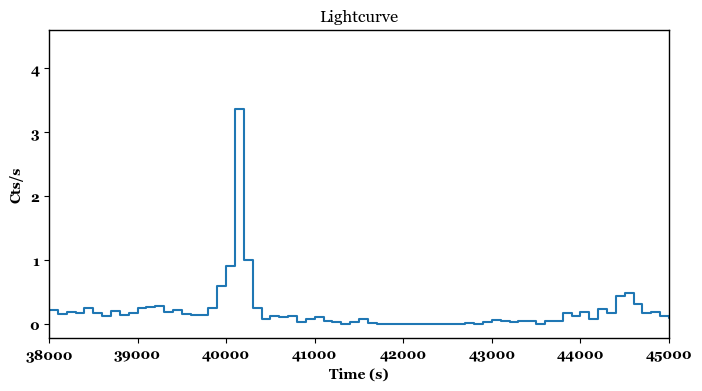

In [20]:
# Plot global LC
q_flag  = "#XMMEA_EMOS1" # Quality flag for EPIC pn
n_pattern = 12
lc_bin  = 100
event_file = work_dir+'/2232_0671960101_EMOS1_S001_ImagingEvts.ds'
out_file = 'full_bkg.lc'

expression = f'{q_flag}&&(PATTERN<={n_pattern}) && (PI > 10000) '  # event filter expression
inargs     = [f'table={event_file}','energycolumn=PI','withrateset=yes',f'rateset={out_file}',
              f'timebinsize={lc_bin}','maketimecolumn=yes','makeratecolumn=yes',f'expression={expression}']
wrap('evselect', inargs).run()

plt.figure(figsize=(8,4))
plot_LC(plt, 'full_bkg.lc')
plt.xlim(38000, 45000)
plt.show()

In [22]:
# SAS Command
cmd    = 'tabgtigen'  # SAS task to be executed

# Arguments of SAS Command
inargs = ['table=full_bkg.lc', 'gtiset=gti.fits', 'expression=(RATE<=0.35)']        # comma separated arguments for SAS task

print("   SAS command to be executed: "+cmd+", with arguments; ", inargs)

wrap(cmd, inargs).run()

   SAS command to be executed: tabgtigen, with arguments;  ['table=full_bkg.lc', 'gtiset=gti.fits', 'expression=(RATE<=0.35)']
Executing: 
tabgtigen table='full_bkg.lc' gtiset='gti.fits' expression='(RATE<=0.35)' timecolumn='TIME' prefraction='0.5' postfraction='0.5' mingtisize='0.0' 
tabgtigen:- Executing (routine): tabgtigen table=full_bkg.lc gtiset=gti.fits expression=(RATE<=0.35) timecolumn=TIME prefraction=0.5 postfraction=0.5 mingtisize=0  -w 1 -V 4
tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-09T19:13:27.000
tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-09T19:13:27.000


Filename: gti.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  STDGTI        1 BinTableHDU     30   9R x 2C   [D, D]   
['TIME', 'RAWX', 'RAWY', 'DETX', 'DETY', 'X', 'Y', 'PHA', 'PI', 'FLAG', 'PATTERN', 'CCDNR']
       TIME        RAWX RAWY  DETX  DETY  ... PHA    PI    FLAG  PATTERN CCDNR
------------------ ---- ---- ----- ------ ... ---- ----- ------- ------- -----
445726227.29042935  395  173  2079  -2797 ... 1127  3710       0       1     1
 445726228.3395948  344  235   955  -1448 ...  743  2462       0       0     1
 445726226.2823121  252  287 -1074   -295 ... 3623 11925       0       0     1
 445726226.4492388  344  381   966   1775 ...  107   371       0       0     1
 445726227.8507613   30  488 -5956   4138 ... 3988 13134 4194304       0     1
445726228.56034875  454  349  3380   1063 ... 3992 13153 4194304       0     1
 445726233.2984725  412   79  2450  -4883 ...  483  1588       0       0     1
   

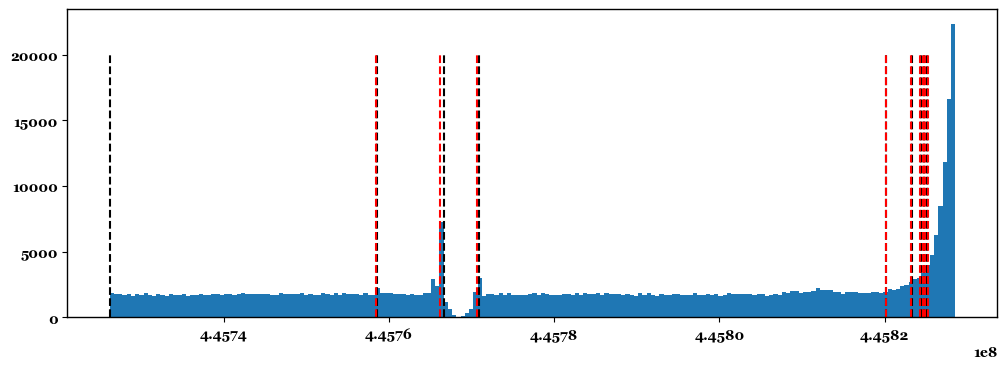

In [30]:
hdul = fits.open('gti.fits')
hdul.info()

gti = Table(hdul[1].data)
# Do these times line up with the expected times?

events = Table(fits.open(event_file)[1].data)
print(events.colnames)
print(events)

plt.figure(figsize=(12,4))
plt.hist(events['TIME'], bins=200)
plt.vlines(gti['START'], 0,20000, 'k','--')
plt.vlines(gti['STOP'], 0, 20000, 'r','--')
plt.show()

In [34]:
# SAS Command
cmd    = 'emproc'  # SAS task to be executed

# Arguments of SAS Command
inargs = ['withgtiset=yes','gtiset=gti.fits']        # comma separated arguments for SAS task

print("   SAS command to be executed: " + cmd + ', with arguments; \n', inargs)

   SAS command to be executed: emproc, with arguments; 
 ['withgtiset=yes', 'gtiset=gti.fits']


In [36]:
print("Running emproc ..... \n")

# Check if emproc has already run. If it has, do not run again 
exists = 0
m1evt_list = []
m2evt_list = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if (filename.find('EMOS1') != -1) and filename.endswith('ImagingEvts.ds'):
            m1evt_list.append(filename)
            exists = 1 
        if (filename.find('EMOS2') != -1) and filename.endswith('ImagingEvts.ds'):
            m2evt_list.append(filename)
            exists = 1            
if exists:    
    print(" > " + str(len(m1evt_list)) + " EPIC-MOS1 event list found. Not running emproc again.\n")
    for x in m1evt_list:
        print("    " + x + "\n")
    print(" > " + str(len(m2evt_list)) + " EPIC-MOS2 event list found. Not running emproc again.\n")
    for x in m2evt_list:
        print("    " + x + "\n")
    print("..... OK")
else:
    wrap(cmd,inargs).run()      # <<<<< Execute SAS task
    exists = 0 
    m1evt_list = []
    m2evt_list = []
    for root, dirs, files in os.walk("."):  
        for filename in files:
            if (filename.find('EMOS1') != -1) and filename.endswith('ImagingEvts.ds'):
                m1evt_list.append(filename)
                exists = 1 
            if (filename.find('EMOS2') != -1) and filename.endswith('ImagingEvts.ds'):
                m2evt_list.append(filename)
                exists = 1            
    if exists:    
        print(" > " + str(len(m1evt_list)) + " EPIC-MOS1 event list found. Not running emproc again.\n")
        for x in m1evt_list:
            print("    " + x + "\n")
        print(" > " + str(len(m2evt_list)) + " EPIC-MOS2 event list found. Not running emproc again.\n")
        for x in m2evt_list:
            print("    " + x + "\n")
        print("..... OK")
    else:
        print("Something has gone wrong with emproc. I cant find any event list file. \n")

Running emproc ..... 

 > 3 EPIC-MOS1 event list found. Not running emproc again.

    2232_0671960101_EMOS1_S001_ImagingEvts.ds

    0327_0101441401_EMOS1_S003_ImagingEvts.ds

    0327_0101441401_EMOS1_U002_ImagingEvts.ds

 > 2 EPIC-MOS2 event list found. Not running emproc again.

    2232_0671960101_EMOS2_S002_ImagingEvts.ds

    0327_0101441401_EMOS2_S004_ImagingEvts.ds

..... OK


# Process EPIC-PN

In [52]:
# SAS Command
cmd    = 'epproc'  # SAS task to be executed

# Arguments of SAS Command
inargs = ['gtiset=gti.fits']        # comma separated arguments for SAS task

print("   SAS command to be executed: "+cmd+", with arguments; \n")
print(inargs)

   SAS command to be executed: epproc, with arguments; 

['gtiset=gti.fits']


In [54]:
print("Running epproc ..... \n")

# Check if epproc has already run. If it has, do not run again 
exists = 0
pnevt_list = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if (filename.find('EPN') != -1) and filename.endswith('ImagingEvts.ds'):
            pnevt_list.append(filename)
            exists = 1        
if exists:    
    print(" > " + str(len(pnevt_list)) + " EPIC-pn event list found. Not running epproc again.\n")
    for x in pnevt_list:
        print("    " + x + "\n")
    print("..... OK")
else:
    wrap(cmd,inargs).run()      # <<<<< Execute SAS task
    exists = 0
    pnevt_list = []
    for root, dirs, files in os.walk("."):  
        for filename in files:
            if (filename.find('EPN') != -1) and filename.endswith('ImagingEvts.ds'):
                pnevt_list.append(filename)
                exists = 1        
    if exists:    
        print(" > " + str(len(pnevt_list)) + " EPIC-pn event list found after running epproc.\n")
        for x in pnevt_list:
            print("    " + x + "\n")
        print("..... OK")
    else:
        print('\nSomething has gone wrong with epproc. I cant find any event list files after running. \n')

Running epproc ..... 

Executing: 
epproc withdefaultcal='yes' removetemporaries='yes' removeintermediategtis='yes' removeintermediateeventlists='yes' pileuptempfile='no' selectccds='no' ccd1='no' ccd2='no' ccd3='no' ccd4='no' ccd5='no' ccd6='no' ccd7='no' ccd8='no' ccd9='no' ccd10='no' ccd11='no' ccd12='no' selectmodes='yes' imaging='yes' timing='yes' burst='no' timingsrcposition='190' withinstexpids='no' instexpids='' withgtiset='no' gtiset='gti.fits' runhkgtigen='yes' runatthkgen='yes' referencepointing='median' ra='0' dec='0' posangle='0' filterevents='yes' filterexpression='(PI > 150 && RAWY > 0)' flagfilteredevents='no' rungtimerge='no' applygti='yes' runevlistcomb='yes' othertables='EXPOSURE BADPIX STDGTI DLIMAP HKAUX' runepexposure='yes' randomizetime='yes' spatialexposure='yes' deleteexposurecolumns='yes' searchforbadpixels='yes' searchforbadcolumns='yes' thresholdlabel='rate' lothresh='0' hithresh='0.0045' columnsearchlabel='median' locolthresh='0' hicolthresh='0.00105' flick

** epproc::epframes: warning (UnidentifiedTimeGaps), Time intervals were found whose duration appear not to be integer multiples of the nominal frame integration time of 0.07336s for the current mode. This hints at either an undetected random jump of the FTCOARSE time counter or another unknown anomaly with the auxiliary data from quadrant 0. If a detailed timing analysis is to be carried out on the event data please note that undetected jumps are very likely to lead to artifacts in timing data products such as pulse profile curves. Please contact the SOC for advice.
** epproc::epframes: warning (InvalidObtValue), OBT vector element #516 is invalid (-100)
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366963520   366995920       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366995920   367028320       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    367028320   367060720       32400
epproc::epframes:-  Number of F1030 resets:        

epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:              49
epproc::epframes:-  Number of SAS MIP column rejections: 0.00000 for FF-Mode in 1.467 [s] =  0.0000 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  53410  15479
epproc::epframes:-    DLI for X =      2   1498   5820
epproc::epframes:-    DLI for X =      3   2783   5992
epproc::epframes:-    DLI for X =      4   3485   6009
epproc::epframes:-    DLI for X =     61   2796   7381
epproc::epframes:-    DLI for X =     62   2867   7071
epproc::epframes:-    DLI for X =     63   2618   7366
epproc::epframes:-    DLI for X =     64  54461  15746
epproc::epframes:-  DLI analysis: sum =    184794  mean =    2980.5  median =    2926.0  deviation =     1.008  mean2 =    3011.3  median2 =    2980.0
epproc::epframes:-  EVT analysis: sum =    332019  mean =    5355.1  median =    5092.0  deviation =     3.688
e

epproc::badpix:- Executing (routine): badpix eventset=.//2232_0671960101_EPN_S003_01_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//2232_0671960101_EPN_S003_01_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=no outset=out.fits withoutset=no  -w 1 -V 4
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:54:50.000
epproc::badpix:-  BadPixelTable code: 0_004_BAD
epproc::badpix:-           72  final bad pixel sets will be added to BADPIX extension
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:54:50.000
epproc:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:54:50.000
epproc:- Executing (invoked): epevents eventset=.//2232_0671960101_EPN_S003_01_EvtsFramesTemp.ds randomizeposition=yes randomizeenergy=yes testenergywidth=yes outset=.//2232_0671960101_EPN_S003_01_Evts.ds gainctiaccuracy=2 reemissionthresh=0 patternanalysis=yes withoutoftime=no

epproc::epevents:-   580816   22467              NaN   445760606.0206              NaN       0         0.0   185.6081
epproc::epevents:-   587348   22713              NaN   445760968.0035              NaN       0         0.0   185.6081
epproc::epevents:-   591457   22884              NaN   445761219.1319              NaN       0         0.0   185.6081
epproc::epevents:-   605866   23464              NaN   445762071.6332              NaN       0         0.0   185.6081
epproc::epevents:-   606555   23491              NaN   445762111.8372              NaN       0         0.0   185.6081
epproc::epevents:-   625968   24270              NaN   445763257.0648              NaN       0         0.0   185.6081
epproc::epevents:-   639660   24798              NaN   445764033.2665              NaN       0         0.0   185.6081
epproc::epevents:-   661686   25619              NaN   445765240.6343              NaN       0         0.0   185.6081
epproc::epevents:-   664820   25718              NaN   4

epproc::epevents:-  1538133   59342              NaN   445818329.6195              NaN       0         0.0   185.6081
epproc::epevents:-  1557394   60089              NaN   445819427.8208              NaN       0         0.0   185.6081
epproc::epevents:-  1560694   60220              NaN   445819619.9638              NaN       0         0.0   185.6081
epproc::epevents:-  1563102   60300              NaN   445819738.0082              NaN       0         0.0   185.6081
epproc::epevents:-  1574499   60743              NaN   445820388.6094              NaN       0         0.0   185.6081
epproc::epevents:-  1596107   61586              NaN   445821628.4786              NaN       0         0.0   185.6081
epproc::epevents:-  1611509   62152              NaN   445822462.4191              NaN       0         0.0   185.6081
epproc::epevents:-  1639099   63106              NaN   445823864.3517              NaN       0         0.0   185.6081
epproc::epevents:-  1650355   63464              NaN   4

epproc::epframes:- Executing (routine): epframes set=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_PNS00302IME.FIT eventset=.//2232_0671960101_EPN_S003_02_EvtsFramesTemp.ds gtiset=.//2232_0671960101_EPN_S003_02_FrmGti.ds withradmon=no radmonset=radmon.dat wrongpixlimit=20 srcra=0 srcdec=0 withsrccoords=no srcposition=190 withsrcrawy=no withfinetime=yes lowerthreshold=0 fifogtithresh=76 withfifogti=no mipthreshold=3000 mipmethod=onboard qualmax=0 eventmapset=eventmap.dat nomipthresholdlow=40 nomipthresholdhigh=1600 softthresholdlow=20 softthresholdhigh=30 witheventmap=no mipdist=no mipdiscard=yes f1294=0 f1052=32400 f1118=UNKNOWN anchop=0 ancmloth=532 ancmcorr=512 aneamipsel=1 anmaxmip=63 anmip=3512 anmaxfrc=20 ansendmode='MIP CORREC.2' ecntempqb1=-9999.9 hcettmpfpf=-89.965 automode=no autofilter=no odfok=yes hkok=yes setupbpx=nom6 ccfok=yes withinvalidobt=yes withallobtgti=yes guessdeltap=no showccx=no showaux=no showpmh=no showpah=no showve=no  -w 1 -V 4
epproc::epfram

epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:              43
epproc::epframes:-  Number of frames > MAXMIP:        59   of total:    729687
epproc::epframes:-  Number of SAS MIP column rejections: 0.00561 for FF-Mode in 1.467 [s] =  0.0038 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  53196  12114
epproc::epframes:-    DLI for X =      2   1370   6410
epproc::epframes:-    DLI for X =      3   1662   6272
epproc::epframes:-    DLI for X =      4   1618   5971
epproc::epframes:-    DLI for X =     61   1886   6881
epproc::epframes:-    DLI for X =     62   1817   6742
epproc::epframes:-    DLI for X =     63   1486   6832
epproc::epframes:-    DLI for X =     64  53731  14955
epproc::epframes:-  DLI analysis: sum =     90291  mean =    1456.3  median =    1444.5  deviation =     0.311  mean2 =    1457.2  median2 =    1444.5
epproc::epframes:-  EVT analysis:

epproc::badpixfind:- Executing (routine): badpixfind eventset=.//2232_0671960101_EPN_S003_02_EvtsForBadpixfindTemp.ds lothresh=0 hithresh=0.0045 searchbadpix=yes columnsearchlabel=median locolthresh=0 hicolthresh=0.00105 withsearchbadcolumn=yes rawxlist='' rawylist='' typelist='' yextentlist='' userflagbadpix=no thresholdlabel=rate flickertimesteps=1 flickerksthresh=0.55 flickerchisqthresh=15 cellsize=2 backgroundrate=0.00011 narrowerthanpsf=1.5 badpixset=.//2232_0671960101_EPN_S003_02_Badpixels.ds badpixmap=badpixmap.fits withbadpixmap=no withfovmask=no threshabovebackground=no mappixcellsize=1 loenergythresh=0.14 hienergythresh=12 ccd=-1  -w 1 -V 4
epproc::badpixfind:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:55:27.000
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead columns
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead pixels
epproc::badpixfind:

epproc::epevents:-   244530   12241              NaN   445745578.0166              NaN       0         0.0   185.6081
epproc::epevents:-   257469   12861              NaN   445746489.5764              NaN       0         0.0   185.6081
epproc::epevents:-   263594   13167              NaN   445746939.3037              NaN       0         0.0   185.6081
epproc::epevents:-   264727   13231              NaN   445747033.5043              NaN       0         0.0   185.6081
epproc::epevents:-   266730   13335              NaN   445747186.1768              NaN       0         0.0   185.6081
epproc::epevents:-   281885   14098              NaN   445748307.4872              NaN       0         0.0   185.6081
epproc::epevents:-   287008   14347              NaN   445748673.4316              NaN       0         0.0   185.6081
epproc::epevents:-   288571   14431              NaN   445748796.9783              NaN       0         0.0   185.6081
epproc::epevents:-   293433   14678              NaN   4

epproc::epevents:-   750918   37309              NaN   445785685.1948              NaN       0         0.0   185.6081
epproc::epevents:-   758975   37731              NaN   445786305.8629              NaN       0         0.0   185.6081
epproc::epevents:-   775410   38580              NaN   445787553.0682              NaN       0         0.0   185.6081
epproc::epevents:-   789014   39279              NaN   445788580.6187              NaN       0         0.0   185.6081
epproc::epevents:-   805725   40154              NaN   445789866.9277              NaN       0         0.0   185.6081
epproc::epevents:-   818397   40804              NaN   445790821.9935              NaN       0         0.0   185.6081
epproc::epevents:-   837179   41773              NaN   445792468.3779              NaN       0         0.0   185.6081
epproc::epevents:-   849791   42445              NaN   445793456.0912              NaN       0         0.0   185.6081
epproc::epevents:-   872795   43628              NaN   4

epproc::dsrename:- Executing (routine): dsrename newname=EXPOSU02 object=.//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSURE  -w 1 -V 4
epproc::dsrename:- dsrename (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:55:50.000
epproc::dsrename:- dsrename (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:55:50.000
epproc:- dsrename (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:55:50.000
epproc:- Executing (invoked): dsrm objects='.//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSU02:FRAMELIM .//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSU02:NDSCLIN1 .//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSU02:NDSCLIN2 .//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSU02:NDSCLIN3 .//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSU02:NDSCLIN4'  -w 1 -V 4
epproc:- dsrm (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:55:50.000
epproc::dsrm:- Executing (routine): dsrm objects='.//2232_0671960101_EPN_S003_02_Evts.ds:EXPOSU02:FRAMELIM 

epproc::epframes:- H_CE_TTMPFPF: average =  -89.942 [deg C], range = [ -90.058, -89.403]
epproc::epframes:- D_P_S_TEMP1:  average =    1.817 [deg C], range = [   1.224,   2.492]
epproc::epframes:- D_P_S_TEMP2:  average =    3.442 [deg C], range = [   2.873,   4.268]
epproc::epframes:- C_CE_TEMPBOX: average =   -0.575 [deg C], range = [  -1.850,  -0.120]
epproc::epframes:- V_VC_TEMP1:   average =   33.433 [deg C], range = [  32.750,  34.480]
epproc::epframes:- V_VC_TEMP2:   average =   18.926 [deg C], range = [  18.910,  20.640]
epproc::epframes:- H_CE_FWTEMP1: average =    8.789 [deg C], range = [   6.748,  10.335]
epproc::epframes:- H_CE_FWTEMP2: average =    6.960 [deg C], range = [   4.935,   9.416]
epproc::epframes:- F1574:        average =   18.082 [deg C], range = [  13.096,  21.464]
epproc::epframes:- F1674:        average =   20.925 [deg C], range = [  16.712,  25.095]
epproc::epframes:- F1774:        average =   19.447 [deg C], range = [  14.571,  21.270]
epproc::epframes:- F1

epproc::epframes:-  Orbital phase range:   2232.3124  2232.9011  0.5887
epproc::epframes:-  EPIC-pn oscillator shift from HK values:     248.089 [Hz]
epproc::epframes:- sum of good time intervals [s]  =            97939.64370
epproc::epframes:- EPFRAMES finished
epproc::epframes:- epframes (epframes-8.116)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:55:59.000
** epproc::epframes: warning (SummaryOfWarnings), 
   warning InvalidObtValue silently occurred 174 times
   warning UnidentifiedTimeGaps silently occurred 2 times
   warning notHKconstant silently occurred 2 times
   warning wrongReadoutOrder silently occurred 40 times
epproc:- epframes (epframes-8.116)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:55:59.000
epproc:- Executing (invoked): badpixfind eventset=.//2232_0671960101_EPN_S003_03_EvtsForBadpixfindTemp.ds lothresh=0 hithresh=0.0045 searchbadpix=yes columnsearchlabel=median locolthresh=0 hicolthresh=0.00105 withsearchbadcolumn=yes rawxlist='' rawylist=''

epproc::epevents:-   234453   11910              NaN   445745092.0531              NaN       0         0.0   185.6081
epproc::epevents:-   238415   12114              NaN   445745391.6757              NaN       0         0.0   185.6081
epproc::epevents:-   241107   12241              NaN   445745578.0227              NaN       0         0.0   185.6081
epproc::epevents:-   253258   12861              NaN   445746489.6558              NaN       0         0.0   185.6081
epproc::epevents:-   259413   13167              NaN   445746939.3832              NaN       0         0.0   185.6081
epproc::epevents:-   260709   13231              NaN   445747033.6572              NaN       0         0.0   185.6081
epproc::epevents:-   262528   13335              NaN   445747186.1096              NaN       0         0.0   185.6081
epproc::epevents:-   278114   14098              NaN   445748307.4933              NaN       0         0.0   185.6081
epproc::epevents:-   282954   14347              NaN   4

epproc::epevents:-   725576   36449              NaN   445784421.4151              NaN       0         0.0   185.6081
epproc::epevents:-   737490   37052              NaN   445785307.5911              NaN       0         0.0   185.6081
epproc::epevents:-   742508   37309              NaN   445785685.1276              NaN       0         0.0   185.6081
epproc::epevents:-   751389   37731              NaN   445786305.7956              NaN       0         0.0   185.6081
epproc::epevents:-   768262   38580              NaN   445787553.1477              NaN       0         0.0   185.6081
epproc::epevents:-   781610   39279              NaN   445788580.5515              NaN       0         0.0   185.6081
epproc::epevents:-   798342   40154              NaN   445789866.9338              NaN       0         0.0   185.6081
epproc::epevents:-   810961   40804              NaN   445790821.9997              NaN       0         0.0   185.6081
epproc::epevents:-   829460   41773              NaN   4

epproc::dsrename:- Executing (routine): dsrename newname=EXPOSU03 object=.//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSURE  -w 1 -V 4
epproc::dsrename:- dsrename (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:56:23.000
epproc::dsrename:- dsrename (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:56:23.000
epproc:- dsrename (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:56:23.000
epproc:- Executing (invoked): dsrm objects='.//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSU03:FRAMELIM .//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSU03:NDSCLIN1 .//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSU03:NDSCLIN2 .//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSU03:NDSCLIN3 .//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSU03:NDSCLIN4'  -w 1 -V 4
epproc:- dsrm (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:56:23.000
epproc::dsrm:- Executing (routine): dsrm objects='.//2232_0671960101_EPN_S003_03_Evts.ds:EXPOSU03:FRAMELIM 

epproc::epframes:- H_CE_TTMPFPF: average =  -89.942 [deg C], range = [ -90.058, -89.403]
epproc::epframes:- D_P_S_TEMP1:  average =    1.817 [deg C], range = [   1.224,   2.492]
epproc::epframes:- D_P_S_TEMP2:  average =    3.442 [deg C], range = [   2.873,   4.268]
epproc::epframes:- C_CE_TEMPBOX: average =   -0.575 [deg C], range = [  -1.850,  -0.120]
epproc::epframes:- V_VC_TEMP1:   average =   33.433 [deg C], range = [  32.750,  34.480]
epproc::epframes:- V_VC_TEMP2:   average =   18.926 [deg C], range = [  18.910,  20.640]
epproc::epframes:- H_CE_FWTEMP1: average =    8.789 [deg C], range = [   6.748,  10.335]
epproc::epframes:- H_CE_FWTEMP2: average =    6.960 [deg C], range = [   4.935,   9.416]
epproc::epframes:- F1574:        average =   18.082 [deg C], range = [  13.096,  21.464]
epproc::epframes:- F1674:        average =   20.925 [deg C], range = [  16.712,  25.095]
epproc::epframes:- F1774:        average =   19.447 [deg C], range = [  14.571,  21.270]
epproc::epframes:- F1

epproc::epframes:-  Orbital phase range:   2232.3124  2232.9011  0.5887
epproc::epframes:-  EPIC-pn oscillator shift from HK values:     248.089 [Hz]
epproc::epframes:- sum of good time intervals [s]  =            97813.67565
epproc::epframes:- EPFRAMES finished
epproc::epframes:- epframes (epframes-8.116)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:56:31.000
** epproc::epframes: warning (SummaryOfWarnings), 
   warning InvalidObtValue silently occurred 138 times
   warning UnidentifiedTimeGaps silently occurred 2 times
   warning notHKconstant silently occurred 2 times
   warning wrongReadoutOrder silently occurred 29 times
epproc:- epframes (epframes-8.116)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:56:31.000
epproc:- Executing (invoked): badpixfind eventset=.//2232_0671960101_EPN_S003_04_EvtsForBadpixfindTemp.ds lothresh=0 hithresh=0.0045 searchbadpix=yes columnsearchlabel=median locolthresh=0 hicolthresh=0.00105 withsearchbadcolumn=yes rawxlist='' rawylist=''

epproc::epevents:-   191913   13492              NaN   445747419.3429              NaN       0         0.0   185.5740
epproc::epevents:-   209092   14694              NaN   445749186.1184              NaN       0         0.0   185.5740
epproc::epevents:-   216593   15217              NaN   445749953.8095              NaN       0         0.0   185.5740
epproc::epevents:-   222715   15625              NaN   445750553.3481              NaN       0         0.0   185.5740
epproc::epevents:-   226223   15859              NaN   445750896.9897              NaN       0         0.0   185.5740
epproc::epevents:-   238277   16690              NaN   445752117.9298              NaN       0         0.0   185.5740
epproc::epevents:-   246891   17288              NaN   445752995.8152              NaN       0         0.0   185.5740
epproc::epevents:-   263112   18401              NaN   445754630.9006              NaN       0         0.0   185.5740
epproc::epevents:-   270345   18903              NaN   4

epproc::epevents:-   431867   62172              NaN   445773286.9603              NaN       0         0.0   185.5740
epproc::epevents:-   432144   62449              NaN   445773320.6348              NaN       0         0.0   185.5740
epproc::epevents:-   432737   63042              NaN   445773386.0031              NaN       0         0.0   185.5740
epproc::epevents:-   433084   63389              NaN   445773420.2646              NaN       0         0.0   185.5740
epproc::epevents:-   433109   63414              NaN   445773423.1258              NaN       0         0.0   185.5740
epproc::epevents:-   434268   64573              NaN   445773539.2626              NaN       0         0.0   185.5740
epproc::epevents:-   435384   65689              NaN   445773657.7471              NaN       0         0.0   185.5740
epproc::epevents:-   435515   65820              NaN   445773668.1649              NaN       0         0.0   185.5740
epproc::epevents:-   436092   66397              NaN   4

epproc::epframes:- Executing (routine): epframes set=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_PNS00305IME.FIT eventset=.//2232_0671960101_EPN_S003_05_EvtsFramesTemp.ds gtiset=.//2232_0671960101_EPN_S003_05_FrmGti.ds withradmon=no radmonset=radmon.dat wrongpixlimit=20 srcra=0 srcdec=0 withsrccoords=no srcposition=190 withsrcrawy=no withfinetime=yes lowerthreshold=0 fifogtithresh=76 withfifogti=no mipthreshold=3000 mipmethod=onboard qualmax=0 eventmapset=eventmap.dat nomipthresholdlow=40 nomipthresholdhigh=1600 softthresholdlow=20 softthresholdhigh=30 witheventmap=no mipdist=no mipdiscard=yes f1294=0 f1052=32400 f1118=UNKNOWN anchop=0 ancmloth=532 ancmcorr=512 aneamipsel=1 anmaxmip=63 anmip=3512 anmaxfrc=20 ansendmode='MIP CORREC.2' ecntempqb1=-9999.9 hcettmpfpf=-89.965 automode=no autofilter=no odfok=yes hkok=yes setupbpx=nom6 ccfok=yes withinvalidobt=yes withallobtgti=yes guessdeltap=no showccx=no showaux=no showpmh=no showpah=no showve=no  -w 1 -V 4
epproc::epfram

epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:              37
epproc::epframes:-  Number of frames > MAXMIP:        50   of total:    523575
epproc::epframes:-  Number of SAS MIP column rejections: 0.00487 for FF-Mode in 1.467 [s] =  0.0033 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  53370  11472
epproc::epframes:-    DLI for X =      2   1483   4531
epproc::epframes:-    DLI for X =      3   1514   4981
epproc::epframes:-    DLI for X =      4   1610   5004
epproc::epframes:-    DLI for X =     61   1663   6511
epproc::epframes:-    DLI for X =     62   1642   7980
epproc::epframes:-    DLI for X =     63   1307   8657
epproc::epframes:-    DLI for X =     64  53190  15762
epproc::epframes:-  DLI analysis: sum =     84905  mean =    1369.4  median =    1387.0  deviation =     0.472  mean2 =    1368.6  median2 =    1387.0
epproc::epframes:-  EVT analysis:

epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead columns
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead pixels
epproc::badpixfind:-   
epproc::badpixfind:-   *** Checking final badpixfind list ***
epproc::badpixfind:-  Creating file (.//2232_0671960101_EPN_S003_05_Badpixels.ds): Number of entries:           12
epproc::badpixfind:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:57:07.000
epproc:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:57:07.000
epproc:- Executing (invoked): badpix eventset=.//2232_0671960101_EPN_S003_05_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//2232_0671960101_EPN_S003_05_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=no outset=out.fits withoutset=no  -w 1 -V 4
epproc:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:57:07.000


epproc::epevents:-   185457   12986              NaN   445746675.9418              NaN       0         0.0   185.5740
epproc::epevents:-   192589   13492              NaN   445747418.9823              NaN       0         0.0   185.5740
epproc::epevents:-   208771   14694              NaN   445749186.0511              NaN       0         0.0   185.5740
epproc::epevents:-   216434   15217              NaN   445749953.8156              NaN       0         0.0   185.5740
epproc::epevents:-   221987   15625              NaN   445750553.5010              NaN       0         0.0   185.5740
epproc::epevents:-   225455   15859              NaN   445750897.1426              NaN       0         0.0   185.5740
epproc::epevents:-   237495   16690              NaN   445752118.3027              NaN       0         0.0   185.5740
epproc::epevents:-   245637   17288              NaN   445752996.4082              NaN       0         0.0   185.5740
epproc::epevents:-   261666   18401              NaN   4

epproc::epevents:-   423623   61940              NaN   445773380.4335              NaN       0         0.0   185.5740
epproc::epevents:-   423855   62172              NaN   445773398.6280              NaN       0         0.0   185.5740
epproc::epevents:-   424132   62449              NaN   445773419.9038              NaN       0         0.0   185.5740
epproc::epevents:-   424725   63042              NaN   445773486.0791              NaN       0         0.0   185.5740
epproc::epevents:-   425072   63389              NaN   445773520.0471              NaN       0         0.0   185.5740
epproc::epevents:-   425097   63414              NaN   445773523.9354              NaN       0         0.0   185.5740
epproc::epevents:-   426256   64573              NaN   445773640.2190              NaN       0         0.0   185.5740
epproc::epevents:-   427372   65689              NaN   445773758.6301              NaN       0         0.0   185.5740
epproc::epevents:-   427503   65820              NaN   4

epproc::epframes:- Executing (routine): epframes set=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_PNS00306IME.FIT eventset=.//2232_0671960101_EPN_S003_06_EvtsFramesTemp.ds gtiset=.//2232_0671960101_EPN_S003_06_FrmGti.ds withradmon=no radmonset=radmon.dat wrongpixlimit=20 srcra=0 srcdec=0 withsrccoords=no srcposition=190 withsrcrawy=no withfinetime=yes lowerthreshold=0 fifogtithresh=76 withfifogti=no mipthreshold=3000 mipmethod=onboard qualmax=0 eventmapset=eventmap.dat nomipthresholdlow=40 nomipthresholdhigh=1600 softthresholdlow=20 softthresholdhigh=30 witheventmap=no mipdist=no mipdiscard=yes f1294=0 f1052=32400 f1118=UNKNOWN anchop=0 ancmloth=532 ancmcorr=512 aneamipsel=1 anmaxmip=63 anmip=3512 anmaxfrc=20 ansendmode='MIP CORREC.2' ecntempqb1=-9999.9 hcettmpfpf=-89.965 automode=no autofilter=no odfok=yes hkok=yes setupbpx=nom6 ccfok=yes withinvalidobt=yes withallobtgti=yes guessdeltap=no showccx=no showaux=no showpmh=no showpah=no showve=no  -w 1 -V 4
epproc::epfram

epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:              36
epproc::epframes:-  Number of frames > MAXMIP:        90   of total:    695018
epproc::epframes:-  Number of SAS MIP column rejections: 0.00884 for FF-Mode in 1.467 [s] =  0.0060 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  53506  10266
epproc::epframes:-    DLI for X =      2   1206   4262
epproc::epframes:-    DLI for X =      3   1730   4365
epproc::epframes:-    DLI for X =      4   1993   3888
epproc::epframes:-    DLI for X =     61   1470   9225
epproc::epframes:-    DLI for X =     62   1624   9294
epproc::epframes:-    DLI for X =     63   1502   9861
epproc::epframes:-    DLI for X =     64  53713  16534
epproc::epframes:-  DLI analysis: sum =    101428  mean =    1635.9  median =    1668.0  deviation =     0.785  mean2 =    1645.3  median2 =    1677.5
epproc::epframes:-  EVT analysis:

epproc::badpix:- Executing (routine): badpix eventset=.//2232_0671960101_EPN_S003_06_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//2232_0671960101_EPN_S003_06_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=no outset=out.fits withoutset=no  -w 1 -V 4
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:57:42.000
epproc::badpix:-  BadPixelTable code: 0_004_BAD
epproc::badpix:- Note - No exact CCF entries contained within Badpixfind file 
epproc::badpix:-           67  final bad pixel sets will be added to BADPIX extension
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:57:42.000
epproc:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:57:42.000
epproc:- Executing (invoked): epevents eventset=.//2232_0671960101_EPN_S003_06_EvtsFramesTemp.ds randomizeposition=yes randomizeenergy=yes testenergywidth=yes outset=.//2232_0671960101_EPN_S003_06_Ev

epproc::epevents:-   484042   27948              NaN   445769364.9526              NaN       0         0.0   185.5740
epproc::epevents:-   484423   28329              NaN   445769502.7321              NaN       0         0.0   185.5740
epproc::epevents:-   484462   28368              NaN   445769512.0494              NaN       0         0.0   185.5740
epproc::epevents:-   484749   28655              NaN   445769630.2405              NaN       0         0.0   185.5740
epproc::epevents:-   485114   29020              NaN   445769731.7776              NaN       0         0.0   185.5740
epproc::epevents:-   485183   29089              NaN   445769787.9752              NaN       0         0.0   185.5740
epproc::epevents:-   485954   29860              NaN   445769974.9093              NaN       0         0.0   185.5740
epproc::epevents:-   486093   29999              NaN   445769995.9650              NaN       0         0.0   185.5740
epproc::epevents:-   486501   30407              NaN   4

epproc::epevents:-   518266   62172              NaN   445772957.2702              NaN       0         0.0   185.5740
epproc::epevents:-   518543   62449              NaN   445772980.4535              NaN       0         0.0   185.5740
epproc::epevents:-   519136   63042              NaN   445773037.7516              NaN       0         0.0   185.5740
epproc::epevents:-   519483   63389              NaN   445773069.0051              NaN       0         0.0   185.5740
epproc::epevents:-   519508   63414              NaN   445773071.0593              NaN       0         0.0   185.5740
epproc::epevents:-   520667   64573              NaN   445773175.2376              NaN       0         0.0   185.5740
epproc::epevents:-   521783   65689              NaN   445773278.3155              NaN       0         0.0   185.5740
epproc::epevents:-   521914   65820              NaN   445773291.6679              NaN       0         0.0   185.5740
epproc::epevents:-   522491   66397              NaN   4

epproc::epframes:- Executing (routine): epframes set=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_PNS00307IME.FIT eventset=.//2232_0671960101_EPN_S003_07_EvtsFramesTemp.ds gtiset=.//2232_0671960101_EPN_S003_07_FrmGti.ds withradmon=no radmonset=radmon.dat wrongpixlimit=20 srcra=0 srcdec=0 withsrccoords=no srcposition=190 withsrcrawy=no withfinetime=yes lowerthreshold=0 fifogtithresh=76 withfifogti=no mipthreshold=3000 mipmethod=onboard qualmax=0 eventmapset=eventmap.dat nomipthresholdlow=40 nomipthresholdhigh=1600 softthresholdlow=20 softthresholdhigh=30 witheventmap=no mipdist=no mipdiscard=yes f1294=0 f1052=32400 f1118=UNKNOWN anchop=0 ancmloth=532 ancmcorr=512 aneamipsel=1 anmaxmip=63 anmip=3512 anmaxfrc=20 ansendmode='MIP CORREC.2' ecntempqb1=-9999.9 hcettmpfpf=-89.965 automode=no autofilter=no odfok=yes hkok=yes setupbpx=nom6 ccfok=yes withinvalidobt=yes withallobtgti=yes guessdeltap=no showccx=no showaux=no showpmh=no showpah=no showve=no  -w 1 -V 4
epproc::epfram

epproc::epframes:-    Wrong readout order for frame     3265801 with           7 events.
** epproc::epframes: warning (wrongFTCoarse),  Illegal FTCOARSE/F1052 time value in AUX file: IAUX, FTCOARSE =      1268535  32401
epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:             105
epproc::epframes:-  Number of SAS MIP column rejections: 0.00000 for FF-Mode in 1.467 [s] =  0.0000 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  53760  10840
epproc::epframes:-    DLI for X =      2   1832   5188
epproc::epframes:-    DLI for X =      3   2935   5613
epproc::epframes:-    DLI for X =      4   3397   5564
epproc::epframes:-    DLI for X =     61   3215   6999
epproc::epframes:-    DLI for X =     62   3259   7058
epproc::epframes:-    DLI for X =     63   3053   7084
epproc::epframes:-    DLI for X =     64  54906   5520
epproc::epframes:-  DLI analysis: sum =    

epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:58:24.000
epproc:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:58:24.000
epproc:- Executing (invoked): epevents eventset=.//2232_0671960101_EPN_S003_07_EvtsFramesTemp.ds randomizeposition=yes randomizeenergy=yes testenergywidth=yes outset=.//2232_0671960101_EPN_S003_07_Evts.ds gainctiaccuracy=2 reemissionthresh=0 patternanalysis=yes withoutoftime=no withctisrcpos=no withgaintiming=yes withgainburst=yes withgaineff=yes withgainff=no withphagaincolumn=no lowgainenergyscale=no withctilongterm=yes ctilongtermsoft=yes ctilongtermy=yes withbackgroundgain=yes backgroundtres=yes backgroundtbin=100 withpatternoffset=yes withccdoffsets=no withtempcorrection=yes withframecti=no withrdpha=yes rdphatimebinsize=100 checksasmip=no lothresh='0 200 500 0' hithresh='200 500 2000 32000' withphotonmap=no photonmapset=photonmap.dat mappatterntype=sssd  -w 1 -V 4
epproc:- epevents (ep

epproc::epevents:-   878283   17310              NaN   445753033.6899              NaN       0         0.0   186.6875
epproc::epevents:-   903774   17810              NaN   445753768.6603              NaN       0         0.0   186.6875
epproc::epevents:-   950210   18713              NaN   445755095.5394              NaN       0         0.0   186.6875
epproc::epevents:-   957933   18858              NaN   445755308.7381              NaN       0         0.0   186.6875
epproc::epevents:-   961472   18932              NaN   445755417.3916              NaN       0         0.0   186.6875
epproc::epevents:-   969563   19091              NaN   445755650.9858              NaN       0         0.0   186.6875
epproc::epevents:-   970560   19110              NaN   445755678.8644              NaN       0         0.0   186.6875
epproc::epevents:-   974507   19188              NaN   445755793.6073              NaN       0         0.0   186.6875
epproc::epevents:-   979575   19288              NaN   4

epproc::epevents:-  1391209   42513              NaN   445770471.5231              NaN       0         0.0   186.6875
epproc::epevents:-  1391254   42558              NaN   445770472.6236              NaN       0         0.0   186.6875
epproc::epevents:-  1392038   43342              NaN   445770504.1705              NaN       0         0.0   186.6875
epproc::epevents:-  1392083   43387              NaN   445770506.1514              NaN       0         0.0   186.6875
epproc::epevents:-  1392173   43477              NaN   445770510.9935              NaN       0         0.0   186.6875
epproc::epevents:-  1392666   43970              NaN   445770525.5931              NaN       0         0.0   186.6875
epproc::epevents:-  1392723   44027              NaN   445770526.6202              NaN       0         0.0   186.6875
epproc::epevents:-  1393512   44816              NaN   445770554.8658              NaN       0         0.0   186.6875
epproc::epevents:-  1394132   45436              NaN   4

epproc::epevents:- EPEVENTS finished
epproc::epevents:- epevents (epevents-6.55)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:59:01.000
epproc:- epevents (epevents-6.55)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T19:59:01.000
epproc:- Executing (invoked): attcalc eventset=.//2232_0671960101_EPN_S003_07_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//2232_0671960101_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:59:01.000
epproc::attcalc:- Executing (routine): attcalc eventset=.//2232_0671960101_EPN_S003_07_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//2232_0671960101_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epproc::attcalc:- attcalc (

epproc::epframes:-  CAL_JUMP_TOLERANCE =    51     [units]
epproc::epframes:-  
** epproc::epframes: warning (UnidentifiedTimeGaps), Time intervals were found whose duration appear not to be integer multiples of the nominal frame integration time of 0.07336s for the current mode. This hints at either an undetected random jump of the FTCOARSE time counter or another unknown anomaly with the auxiliary data from quadrant 2. If a detailed timing analysis is to be carried out on the event data please note that undetected jumps are very likely to lead to artifacts in timing data products such as pulse profile curves. Please contact the SOC for advice.
** epproc::epframes: warning (InvalidObtValue), OBT vector element #1556 is invalid (-100)
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366963520   366995920       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366995920   367028320       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    3670

** epproc::epframes: warning (wrongFTCoarse),  Illegal FTCOARSE/F1052 time value in AUX file: IAUX, FTCOARSE =      1268535  32401
epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:             131
epproc::epframes:-  Number of frames > MAXMIP:        46   of total:   1155656
epproc::epframes:-  Number of SAS MIP column rejections: 0.00542 for FF-Mode in 1.467 [s] =  0.0037 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  54319  13508
epproc::epframes:-    DLI for X =      2   2465   7619
epproc::epframes:-    DLI for X =      3   2746   6979
epproc::epframes:-    DLI for X =      4   2363   7228
epproc::epframes:-    DLI for X =     61   2199   7659
epproc::epframes:-    DLI for X =     62   2518   7863
epproc::epframes:-    DLI for X =     63   2113   8159
epproc::epframes:-    DLI for X =     64  54089  15741
epproc::epframes:-  DLI analysis: sum =    114777  me

epproc::badpixfind:- Executing (routine): badpixfind eventset=.//2232_0671960101_EPN_S003_08_EvtsForBadpixfindTemp.ds lothresh=0 hithresh=0.0045 searchbadpix=yes columnsearchlabel=median locolthresh=0 hicolthresh=0.00105 withsearchbadcolumn=yes rawxlist='' rawylist='' typelist='' yextentlist='' userflagbadpix=no thresholdlabel=rate flickertimesteps=1 flickerksthresh=0.55 flickerchisqthresh=15 cellsize=2 backgroundrate=0.00011 narrowerthanpsf=1.5 badpixset=.//2232_0671960101_EPN_S003_08_Badpixels.ds badpixmap=badpixmap.fits withbadpixmap=no withfovmask=no threshabovebackground=no mappixcellsize=1 loenergythresh=0.14 hienergythresh=12 ccd=-1  -w 1 -V 4
epproc::badpixfind:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T19:59:37.000
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead columns
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead pixels
epproc::badpixfind:

epproc::epevents:-   446985    9455              NaN   445741487.5160              NaN       0         0.0   186.6875
epproc::epevents:-   448971    9495              NaN   445741546.1345              NaN       0         0.0   186.6875
epproc::epevents:-   457057    9665              NaN   445741796.0156              NaN       0         0.0   186.6875
epproc::epevents:-   465819    9850              NaN   445742068.0530              NaN       0         0.0   186.6875
epproc::epevents:-   480788   10176              NaN   445742546.3192              NaN       0         0.0   186.6875
epproc::epevents:-   499425   10576              NaN   445743134.1193              NaN       0         0.0   186.6875
epproc::epevents:-   531032   11251              NaN   445744126.6006              NaN       0         0.0   186.6875
epproc::epevents:-   535422   11349              NaN   445744270.7628              NaN       0         0.0   186.6875
epproc::epevents:-   539722   11440              NaN   4

epproc::epevents:-  1295597   45436              NaN   445770609.7489              NaN       0         0.0   186.6875
epproc::epevents:-  1295613   45452              NaN   445770609.9690              NaN       0         0.0   186.6875
epproc::epevents:-  1295905   45744              NaN   445770617.6723              NaN       0         0.0   186.6875
epproc::epevents:-  1295942   45781              NaN   445770618.1859              NaN       0         0.0   186.6875
epproc::epevents:-  1296414   46253              NaN   445770635.0598              NaN       0         0.0   186.6875
epproc::epevents:-  1296547   46386              NaN   445770640.5622              NaN       0         0.0   186.6875
epproc::epevents:-  1297081   46920              NaN   445770660.5908              NaN       0         0.0   186.6875
epproc::epevents:-  1297188   47027              NaN   445770664.7727              NaN       0         0.0   186.6875
epproc::epevents:-  1297316   47155              NaN   4

epproc::epevents:- EPEVENTS finished
epproc::epevents:- epevents (epevents-6.55)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:00:14.000
epproc:- epevents (epevents-6.55)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:00:14.000
epproc:- Executing (invoked): attcalc eventset=.//2232_0671960101_EPN_S003_08_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//2232_0671960101_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:00:14.000
epproc::attcalc:- Executing (routine): attcalc eventset=.//2232_0671960101_EPN_S003_08_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//2232_0671960101_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epproc::attcalc:- attcalc (

** epproc::epframes: warning (UnidentifiedTimeGaps), Time intervals were found whose duration appear not to be integer multiples of the nominal frame integration time of 0.07336s for the current mode. This hints at either an undetected random jump of the FTCOARSE time counter or another unknown anomaly with the auxiliary data from quadrant 2. If a detailed timing analysis is to be carried out on the event data please note that undetected jumps are very likely to lead to artifacts in timing data products such as pulse profile curves. Please contact the SOC for advice.
** epproc::epframes: warning (InvalidObtValue), OBT vector element #1556 is invalid (-100)
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366963520   366995920       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366995920   367028320       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    367028320   367060720       32400
epproc::epframes:-  Number of F1030 resets:       

epproc::epframes:-    Wrong readout order for frame     3265801 with           7 events.
epproc::epframes:-    Wrong readout order for frame     4269358 with          68 events.
** epproc::epframes: warning (wrongFTCoarse),  Illegal FTCOARSE/F1052 time value in AUX file: IAUX, FTCOARSE =      1268535  32401
epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:              96
epproc::epframes:-  Number of frames > MAXMIP:        62   of total:   1106146
epproc::epframes:-  Number of SAS MIP column rejections: 0.00921 for FF-Mode in 1.467 [s] =  0.0063 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  52764  14458
epproc::epframes:-    DLI for X =      2    579   8178
epproc::epframes:-    DLI for X =      3    528   7360
epproc::epframes:-    DLI for X =      4    842   7725
epproc::epframes:-    DLI for X =     61   1169   7274
epproc::epframes:-    DLI for X =     62

epproc::badpixfind:- Executing (routine): badpixfind eventset=.//2232_0671960101_EPN_S003_09_EvtsForBadpixfindTemp.ds lothresh=0 hithresh=0.0045 searchbadpix=yes columnsearchlabel=median locolthresh=0 hicolthresh=0.00105 withsearchbadcolumn=yes rawxlist='' rawylist='' typelist='' yextentlist='' userflagbadpix=no thresholdlabel=rate flickertimesteps=1 flickerksthresh=0.55 flickerchisqthresh=15 cellsize=2 backgroundrate=0.00011 narrowerthanpsf=1.5 badpixset=.//2232_0671960101_EPN_S003_09_Badpixels.ds badpixmap=badpixmap.fits withbadpixmap=no withfovmask=no threshabovebackground=no mappixcellsize=1 loenergythresh=0.14 hienergythresh=12 ccd=-1  -w 1 -V 4
epproc::badpixfind:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:00:49.000
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead columns
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead pixels
epproc::badpixfind:

epproc::epevents:-   389264    9455              NaN   445741487.5221              NaN       0         0.0   186.6875
epproc::epevents:-   390970    9495              NaN   445741546.1407              NaN       0         0.0   186.6875
epproc::epevents:-   397878    9665              NaN   445741796.0218              NaN       0         0.0   186.6875
epproc::epevents:-   405366    9850              NaN   445742067.9857              NaN       0         0.0   186.6875
epproc::epevents:-   419459   10176              NaN   445742546.4720              NaN       0         0.0   186.6875
epproc::epevents:-   436428   10576              NaN   445743134.1254              NaN       0         0.0   186.6875
epproc::epevents:-   464569   11251              NaN   445744126.6067              NaN       0         0.0   186.6875
epproc::epevents:-   468402   11349              NaN   445744270.7689              NaN       0         0.0   186.6875
epproc::epevents:-   472107   11440              NaN   4

epproc::epevents:-  1141292   46920              NaN   445770745.9205              NaN       0         0.0   186.6875
epproc::epevents:-  1141399   47027              NaN   445770748.4149              NaN       0         0.0   186.6875
epproc::epevents:-  1141527   47155              NaN   445770751.3495              NaN       0         0.0   186.6875
epproc::epevents:-  1141622   47250              NaN   445770753.9906              NaN       0         0.0   186.6875
epproc::epevents:-  1141757   47385              NaN   445770760.3734              NaN       0         0.0   186.6875
epproc::epevents:-  1141762   47390              NaN   445770760.5201              NaN       0         0.0   186.6875
epproc::epevents:-  1141819   47447              NaN   445770763.5281              NaN       0         0.0   186.6875
epproc::epevents:-  1141884   47512              NaN   445770764.8486              NaN       0         0.0   186.6875
epproc::epevents:-  1142018   47646              NaN   4

epproc::epevents:- EPEVENTS finished
epproc::epevents:- epevents (epevents-6.55)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:01:21.000
epproc:- epevents (epevents-6.55)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:01:21.000
epproc:- Executing (invoked): attcalc eventset=.//2232_0671960101_EPN_S003_09_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//2232_0671960101_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:01:21.000
epproc::attcalc:- Executing (routine): attcalc eventset=.//2232_0671960101_EPN_S003_09_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//2232_0671960101_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epproc::attcalc:- attcalc (

epproc::epframes:-  CAL_JUMP_TOLERANCE =    51     [units]
epproc::epframes:-  
** epproc::epframes: warning (UnidentifiedTimeGaps), Time intervals were found whose duration appear not to be integer multiples of the nominal frame integration time of 0.07336s for the current mode. This hints at either an undetected random jump of the FTCOARSE time counter or another unknown anomaly with the auxiliary data from quadrant 3. If a detailed timing analysis is to be carried out on the event data please note that undetected jumps are very likely to lead to artifacts in timing data products such as pulse profile curves. Please contact the SOC for advice.
** epproc::epframes: warning (InvalidObtValue), OBT vector element #258 is invalid (-100)
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366963520   366995920       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    366995920   367028320       32400
epproc::epframes:-  Reset F1030: Time_o  Time_n  Length =    36702

epproc::epframes:-    Wrong readout order for frame     2609805 with           5 events.
epproc::epframes:-    Wrong readout order for frame     3112965 with           4 events.
epproc::epframes:-    Wrong readout order for frame     4269297 with          10 events.
epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:             178
epproc::epframes:-  Number of SAS MIP column rejections: 0.00000 for FF-Mode in 1.467 [s] =  0.0000 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  55009  12478
epproc::epframes:-    DLI for X =      2   3043   5271
epproc::epframes:-    DLI for X =      3   3124   5052
epproc::epframes:-    DLI for X =      4   3144   5458
epproc::epframes:-    DLI for X =     61   3447   3721
epproc::epframes:-    DLI for X =     62   2695   4496
epproc::epframes:-    DLI for X =     63   1201   7010
epproc::epframes:-    DLI for X =     64  52963  13

epproc::badpix:- Executing (routine): badpix eventset=.//2232_0671960101_EPN_S003_10_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//2232_0671960101_EPN_S003_10_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=no outset=out.fits withoutset=no  -w 1 -V 4
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:01:57.000
epproc::badpix:-  BadPixelTable code: 0_004_BAD
epproc::badpix:- Note - No exact CCF entries contained within Badpixfind file 
epproc::badpix:-           85  final bad pixel sets will be added to BADPIX extension
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:01:58.000
epproc:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:01:58.000
epproc:- Executing (invoked): epevents eventset=.//2232_0671960101_EPN_S003_10_EvtsFramesTemp.ds randomizeposition=yes randomizeenergy=yes testenergywidth=yes outset=.//2232_0671960101_EPN_S003_10_Ev

epproc::epevents:-  1597292   24419              NaN   445763484.9915              NaN       0         0.0   187.3525
epproc::epevents:-  1605437   24541              NaN   445763664.1488              NaN       0         0.0   187.3525
epproc::epevents:-  1649015   25215              NaN   445764654.6497              NaN       0         0.0   187.3525
epproc::epevents:-  1678185   25655              NaN   445765301.1421              NaN       0         0.0   187.3525
epproc::epevents:-  1698048   25923              NaN   445765699.7341              NaN       0         0.0   187.3525
epproc::epevents:-  1708809   26092              NaN   445765958.6392              NaN       0         0.0   187.3525
epproc::epevents:-  1717203   26207              NaN   445766149.8284              NaN       0         0.0   187.3525
epproc::epevents:-  1752949   26710              NaN   445767140.8429              NaN       0         0.0   187.3525
epproc::epevents:-  1764447   27018              NaN   4

epproc::epevents:-  1794506   57077              NaN   445770735.3620              NaN       0         0.0   187.3525
epproc::epevents:-  1795286   57857              NaN   445770753.3365              NaN       0         0.0   187.3525
epproc::epevents:-  1795522   58093              NaN   445770758.6187              NaN       0         0.0   187.3525
epproc::epevents:-  1795642   58213              NaN   445770761.2599              NaN       0         0.0   187.3525
epproc::epevents:-  1796507   59078              NaN   445770782.9759              NaN       0         0.0   187.3525
epproc::epevents:-  1797826   60397              NaN   445770821.6393              NaN       0         0.0   187.3525
epproc::epevents:-  1798482   61053              NaN   445770842.4016              NaN       0         0.0   187.3525
epproc::epevents:-  1799227   61798              NaN   445770856.2676              NaN       0         0.0   187.3525
epproc::epevents:-  1799521   62092              NaN   4

epproc::evselect:- selected 260554 rows from the input table.
epproc::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:03:13.000
epproc:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:03:13.000
epproc:- Processing data set: /Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_PNS00311IME.FIT
epproc:- Executing (invoked): epframes set=/Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_PNS00311IME.FIT eventset=.//2232_0671960101_EPN_S003_11_EvtsFramesTemp.ds gtiset=.//2232_0671960101_EPN_S003_11_FrmGti.ds withradmon=no radmonset=radmon.dat wrongpixlimit=20 srcra=0 srcdec=0 withsrccoords=no srcposition=190 withsrcrawy=no withfinetime=yes lowerthreshold=0 fifogtithresh=76 withfifogti=no mipthreshold=3000 mipmethod=onboard qualmax=0 eventmapset=eventmap.dat nomipthresholdlow=40 nomipthresholdhigh=1600 softthresholdlow=20 softthresholdhigh=30 witheventmap=no mipdist=no mipdiscard=yes f1294=0 f

** epproc::epframes: warning (wrongReadoutOrder),  Events in wrong order: Event      2820022 : IX,IY =     64     43 ; Previous event: IX,IY =     33    129
epproc::epframes:-    Wrong readout order for frame     1927466 with           9 events.
epproc::epframes:-    Wrong readout order for frame     1933580 with           7 events.
epproc::epframes:-    Wrong readout order for frame     1940349 with          10 events.
epproc::epframes:-    Wrong readout order for frame     1942660 with           7 events.
epproc::epframes:-    Wrong readout order for frame     1943138 with          14 events.
epproc::epframes:-    Wrong readout order for frame     1944459 with           9 events.
epproc::epframes:-    Wrong readout order for frame     1946984 with           6 events.
epproc::epframes:-    Wrong readout order for frame     1949473 with          13 events.
epproc::epframes:-    Wrong readout order for frame     1951789 with          13 events.
epproc::epframes:-    Wrong readout order 

epproc::epframes:-    Wrong readout order for frame     3112965 with           9 events.
epproc::epframes:-    Wrong readout order for frame     3265789 with           6 events.
epproc::epframes:-    Wrong readout order for frame     4775055 with           9 events.
epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:             387
epproc::epframes:-  Number of frames > MAXMIP:        45   of total:   1306106
epproc::epframes:-  Number of SAS MIP column rejections: 0.00563 for FF-Mode in 1.467 [s] =  0.0038 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  54867  12332
epproc::epframes:-    DLI for X =      2   2718   5458
epproc::epframes:-    DLI for X =      3   2716   5300
epproc::epframes:-    DLI for X =      4   2552   5544
epproc::epframes:-    DLI for X =     61   2409   8208
epproc::epframes:-    DLI for X =     62   2385   6067
epproc::epframes:-    DLI f

epproc::badpix:- Executing (routine): badpix eventset=.//2232_0671960101_EPN_S003_11_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//2232_0671960101_EPN_S003_11_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=no outset=out.fits withoutset=no  -w 1 -V 4
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:03:24.000
epproc::badpix:-  BadPixelTable code: 0_004_BAD
epproc::badpix:- Note - No exact CCF entries contained within Badpixfind file 
epproc::badpix:-           80  final bad pixel sets will be added to BADPIX extension
epproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:03:25.000
epproc:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:03:25.000
epproc:- Executing (invoked): epevents eventset=.//2232_0671960101_EPN_S003_11_EvtsFramesTemp.ds randomizeposition=yes randomizeenergy=yes testenergywidth=yes outset=.//2232_0671960101_EPN_S003_11_Ev

epproc::epevents:-  1866228   17353              NaN   445753099.8895              NaN       0         0.0   187.3525
epproc::epevents:-  1883473   17515              NaN   445753337.9589              NaN       0         0.0   187.3525
epproc::epevents:-  1925501   17909              NaN   445753917.1021              NaN       0         0.0   187.3525
epproc::epevents:-  1936432   18011              NaN   445754066.9867              NaN       0         0.0   187.3525
epproc::epevents:-  1986993   18476              NaN   445754750.9685              NaN       0         0.0   187.3525
epproc::epevents:-  2045807   19017              NaN   445755546.5385              NaN       0         0.0   187.3525
epproc::epevents:-  2051600   19071              NaN   445755625.8460              NaN       0         0.0   187.3525
epproc::epevents:-  2055678   19110              NaN   445755683.0707              NaN       0         0.0   187.3525
epproc::epevents:-  2074966   19288              NaN   4

epproc::epevents:-  2921884   51558              NaN   445770301.6342              NaN       0         0.0   187.3525
epproc::epevents:-  2921953   51627              NaN   445770305.2291              NaN       0         0.0   187.3525
epproc::epevents:-  2921999   51673              NaN   445770305.8894              NaN       0         0.0   187.3525
epproc::epevents:-  2922117   51791              NaN   445770310.2913              NaN       0         0.0   187.3525
epproc::epevents:-  2925094   54768              NaN   445770400.8237              NaN       0         0.0   187.3525
epproc::epevents:-  2925666   55340              NaN   445770425.8412              NaN       0         0.0   187.3525
epproc::epevents:-  2925709   55383              NaN   445770426.3547              NaN       0         0.0   187.3525
epproc::epevents:-  2925948   55622              NaN   445770433.9113              NaN       0         0.0   187.3525
epproc::epevents:-  2926121   55795              NaN   4

epproc::evselect:- Executing (routine): evselect table=.//2232_0671960101_EPN_S003_11_Evts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(PI > 150 && RAWY > 0)' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

epproc::epframes:- TH_U_X_EPCE:  average =    0.312 [deg C], range = [  -0.278,   0.882]
epproc::epframes:- TH_U_X_EPCH:  average =    1.827 [deg C], range = [   0.588,   2.647]
epproc::epframes:- TH_U_X_EPDH:  average =    1.488 [deg C], range = [   0.882,   2.059]
epproc::epframes:- TH_U_X_EPEA:  average =   12.370 [deg C], range = [  11.000,  13.333]
epproc::epframes:- TH_U_X_EPVC:  average =   11.735 [deg C], range = [  11.000,  12.333]
epproc::epframes:- TH_U_X_FPAmZ: average =   13.222 [deg C], range = [  11.667,  14.000]
epproc::epframes:- TH_U_X_FPApZ: average =    6.016 [deg C], range = [   5.312,   6.562]
epproc::epframes:- TH_U_X_PDU:   average =    7.331 [deg C], range = [   6.875,   7.812]
epproc::epframes:- TH_U_X_RAE1:  average =    9.736 [deg C], range = [   8.438,  10.667]
epproc::epframes:- TH_U_X_RDE11: average =    9.737 [deg C], range = [   8.125,  10.667]
epproc::epframes:-  BadPixelTable code: 0_004_BAD
epproc::epframes:-  Offset table calculation time interval: 

epproc::epframes:-  
epproc::epframes:-  Number of frames with wrong readout order:             105
epproc::epframes:-  Number of frames > MAXMIP:        58   of total:   1090841
epproc::epframes:-  Number of SAS MIP column rejections: 0.00919 for FF-Mode in 1.467 [s] =  0.0063 [columns/s/CCD]
epproc::epframes:-  
epproc::epframes:-  EPN DLI analysis: MIPSEL =            1
epproc::epframes:-    DLI for X =      1  52875  13399
epproc::epframes:-    DLI for X =      2    749   5808
epproc::epframes:-    DLI for X =      3   1447   5200
epproc::epframes:-    DLI for X =      4   1744   5526
epproc::epframes:-    DLI for X =     61   1545   7880
epproc::epframes:-    DLI for X =     62   1355   8063
epproc::epframes:-    DLI for X =     63   1119   9086
epproc::epframes:-    DLI for X =     64  53377  14768
epproc::epframes:-  DLI analysis: sum =     77875  mean =    1256.0  median =    1278.5  deviation =     0.628  mean2 =    1266.8  median2 =    1298.5
epproc::epframes:-  EVT analysis:

epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead columns
epproc::badpixfind:-  
epproc::badpixfind:-   *** Badpixfind Mode1 *** - Searching for hot/dead pixels
epproc::badpixfind:- No hot or dead pixels found - thresholds OK?
epproc::badpixfind:-   
epproc::badpixfind:-   *** Checking final badpixfind list ***
epproc::badpixfind:-  Creating file (.//2232_0671960101_EPN_S003_12_Badpixels.ds): Number of entries:            0
epproc::badpixfind:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:05:28.000
epproc:- badpixfind (badpixfind-1.41)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:05:28.000
epproc:- Executing (invoked): badpix eventset=.//2232_0671960101_EPN_S003_12_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//2232_0671960101_EPN_S003_12_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=no outset=out.fits withoutset=no  -w 1 -V 4
epproc:- badpix (badpix-2.33)

epproc::epevents:-   774007   19017              NaN   445755546.5446              NaN       0         0.0   187.3525
epproc::epevents:-   776103   19071              NaN   445755625.8521              NaN       0         0.0   187.3525
epproc::epevents:-   777605   19110              NaN   445755683.0768              NaN       0         0.0   187.3525
epproc::epevents:-   784781   19288              NaN   445755944.8431              NaN       0         0.0   187.3525
epproc::epevents:-   848355   20867              NaN   445758265.5245              NaN       0         0.0   187.3525
epproc::epevents:-   856719   21060              NaN   445758549.2269              NaN       0         0.0   187.3525
epproc::epevents:-   865543   21275              NaN   445758865.5034              NaN       0         0.0   187.3525
epproc::epevents:-   884821   21746              NaN   445759558.0689              NaN       0         0.0   187.3525
epproc::epevents:-   908816   22346              NaN   4

epproc::epevents:-  1136708   64226              NaN   445771552.2202              NaN       0         0.0   187.3525
epproc::epevents:-  1137125   64643              NaN   445771566.0129              NaN       0         0.0   187.3525
epproc::epevents:-  1137174   64692              NaN   445771567.1867              NaN       0         0.0   187.3525
epproc::epevents:-  1137808   65326              NaN   445771590.6635              NaN       0         0.0   187.3525
epproc::epevents:-  1138043   65561              NaN   445771599.8341              NaN       0         0.0   187.3525
epproc::epevents:-  1138367   65885              NaN   445771612.7464              NaN       0         0.0   187.3525
epproc::epevents:-  1138495   66013              NaN   445771617.0749              NaN       0         0.0   187.3525
epproc::epevents:-  1138579   66097              NaN   445771620.0095              NaN       0         0.0   187.3525
epproc::epevents:- EPEVENTS finished
epproc::epevents:- 

epproc::evlistcomb:- Executing (routine): evlistcomb eventsets='.//2232_0671960101_EPN_S003_01_Evts.ds .//2232_0671960101_EPN_S003_02_Evts.ds .//2232_0671960101_EPN_S003_03_Evts.ds .//2232_0671960101_EPN_S003_04_Evts.ds .//2232_0671960101_EPN_S003_05_Evts.ds .//2232_0671960101_EPN_S003_06_Evts.ds .//2232_0671960101_EPN_S003_07_Evts.ds .//2232_0671960101_EPN_S003_08_Evts.ds .//2232_0671960101_EPN_S003_09_Evts.ds .//2232_0671960101_EPN_S003_10_Evts.ds .//2232_0671960101_EPN_S003_11_Evts.ds .//2232_0671960101_EPN_S003_12_Evts.ds' imagingset=.//2232_0671960101_EPN_S003_ImagingEvts.ds timingset=.//2232_0671960101_EPN_S003_ImagingEvts.ds maintable='EVENTS OFFSETS' othertables='EXPOSURE BADPIX STDGTI DLIMAP HKAUX' primarychecks='TELESCOP INSTRUME OBS_ID EXP_ID' primaryonly=ORIGIN extensionchecks='DET_SYST TIMEUNIT TIMESYS MJDREF TIMEREF TASSIGN TIMEZERO CLOCKAPP TCRPX TCTYP TCRVL TCDLT TCROT TCUNI' maxattributes='TSTOP TLMAX TDMAX' minattributes='TSTART TLMIN TDMIN' mainattributes=PHA_RDCO em

epproc::evlistcomb:-  Entering mode TIMING
epproc::evlistcomb:-  No output for mode TIMING
epproc::evlistcomb:- evlistcomb (evlistcomb-4.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:06:28.000
epproc:- evlistcomb (evlistcomb-4.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:06:28.000
epproc:- Executing (invoked): dscopyblock blocks=/Users/woodml/Observing/XMM-Newton/0671960101/ccf.cif:CALINDEX to=.//2232_0671960101_EPN_S003_ImagingEvts.ds  -w 1 -V 4
epproc:- dscopyblock (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:06:28.000
epproc::dscopyblock:- Executing (routine): dscopyblock blocks=/Users/woodml/Observing/XMM-Newton/0671960101/ccf.cif:CALINDEX to=.//2232_0671960101_EPN_S003_ImagingEvts.ds  -w 1 -V 4
epproc::dscopyblock:- dscopyblock (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-05T20:06:28.000
epproc::dscopyblock:- dscopyblock (daltools-1.11.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:06:30.000
ep

epproc::epexposure:- epexposure (epexposure-0.16)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:07:14.000
** epproc::epexposure: warning (SummaryOfWarnings), 
   warning spatialDLIgeneral silently occurred 11 times
   warning spatialDLIquadrant silently occurred 3 times
epproc:- epexposure (epexposure-0.16)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:07:14.000
epproc:- epproc (epicproc-2.25.3)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-05T20:07:14.000
 > 1 EPIC-pn event list found after running epproc.

    2232_0671960101_EPN_S003_ImagingEvts.ds

..... OK


# Process RGS

In [5]:
# SAS Command
cmd        = "rgsproc" # SAS task to be executed                  

# Arguments of SAS Command
inargs = ['xpsfincl=75']           # set the inclusion radius

# Execute the SAS task to obtain RGS products
wrap(cmd, inargs).run()

Executing: 
rgsproc entrystage='1:events' finalstage='6:lightcurve' withinstexpids='no' instexpids='' orders='1 2' expunge='events' spectrumbinning='lambda' withprefix='no' prefix='' timestep='1' driftlimit='5' onlylastatt='no' withepicset='no' epicset='' withsrc='no' srclabel='USER' srcrate='0' srcstyle='radec' srcra='-999' srcdec='-999' srcdisp='0' srcxdsp='0' attstyle='expmedian' attra='-999' attdec='-999' attapos='-999' includeinputfifofull='yes' calcoffsets='no' withoffsethistogram='no' withdiagoffset='yes' withgain='yes' withcti='yes' withadvisory='yes' badpixalgo='badpixalgo' embadpixalgo='no' withfoundhot='yes' keepcool='yes' pixnoiselimit='0' colnoiselimit='250' pixsharpness='5' colsharpness='8' detcoord='cam' withdetcoord='no' reconstruct='yes' betabinning='binSize' betabinref='0.03578524' betabinwidth='1.208e-05' nbetabins='3400' betamin='0.03' betamax='0.08' xdispbinning='binSize' xdispbinref='-0.0009126' xdispbinwidth='1.08e-05' nxdispbins='170' xdispmin='-0.001' xdispmax=

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T15:59:59.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R1S004events1000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T15:59:59.000
** rgsproc::rgsbadpix: warning (BadPixDiscrepancy), (CCD 1) advisory hot segment at (305,1): 128 out of 128 pixels not found hot in telemetry
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T15:59:59.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R1S004events1000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T15:59:59.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0:

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:10.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R1S004events6000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:10.000
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:10.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R1S004events6000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:10.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0: 143037 events flagged
rgsproc::rgsevents:- ##XMMEA_ON_NODE1: 48792 events flagged
rgsproc::rgsevents:- ##XMMEA_ONBOARD_SER: 24787 events flag

rgsproc::evlistcomb:-  Writing extension STDGTI05 from P0101440801R1S004events5000.FIT:STDGTI
rgsproc::evlistcomb:-  Writing extension BADPIX05 from P0101440801R1S004events5000.FIT:BADPIX0
rgsproc::evlistcomb:-  Writing extension BADPIX15 from P0101440801R1S004events5000.FIT:BADPIX1
rgsproc::evlistcomb:-  Writing extension REJPIX05 from P0101440801R1S004events5000.FIT:REJPIX0
rgsproc::evlistcomb:-  Writing extension REJPIX15 from P0101440801R1S004events5000.FIT:REJPIX1
rgsproc::evlistcomb:-  Writing extension EXPOSU05 from P0101440801R1S004events5000.FIT:EXPOSURE
rgsproc::evlistcomb:-  Writing extension STDGTI06 from P0101440801R1S004events6000.FIT:STDGTI
rgsproc::evlistcomb:-  Writing extension BADPIX06 from P0101440801R1S004events6000.FIT:BADPIX0
rgsproc::evlistcomb:-  Writing extension BADPIX16 from P0101440801R1S004events6000.FIT:BADPIX1
rgsproc::evlistcomb:-  Writing extension REJPIX06 from P0101440801R1S004events6000.FIT:REJPIX0
rgsproc::evlistcomb:-  Writing extension REJPIX16 f

rgsproc:- Executing (routine): hkgtigen instrument=rgs2 gtiset=P0101440801R2S005hkgti_0000.FIT diagfile=STDOUT plotgtis=no diagnosticmode=no withgtiset=yes parameters=L5063 withparameters=yes except=yes overrideparameters='' overrideparametervalues='' withoverrideparameters=no timecolumn=TIME prefraction=0.5 postfraction=0.5  -w 1 -V 4
rgsproc:- hkgtigen (hkgtigen-1.15)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:30.000
rgsproc:- hkgtigen (hkgtigen-1.15)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:31.000
rgsproc:- Executing (routine): rgssources changeprime=no changeattitude=no filemode=create srclist=P0101440801R2S005SRCLI_0000.FIT instexpid=R2S005 writeobskwds=yes writeexpkwds=yes clobberonlabel=no primeindex=1 primelabel=PROPOSAL primeexpression='' primestyle=auto meanset=atthk.dat medianset=atthk.dat attra=0 attdec=0 attapos=0 expmediantable=P0101440801R2S005attgti0000.FIT:STDGTI attstyle=expmedian label=USER rate=0 userasprime=no process=no bkgexclude=y

rgsproc::rgsframes:-  Identified           0 duplicate entries in EXPOSURE table
rgsproc::rgsframes:-            1 frames flagged bad based on instrument bad-condition flags
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       12642 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       13458 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14018 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14778 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       91802 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       91882 ; Estimating frame ti

rgsproc::rgsframes:-  Observing mode was HighEventRateWithSES
rgsproc::rgsframes:-  Identified           0 duplicate entries in EXPOSURE table
rgsproc::rgsframes:-            2 frames flagged bad based on instrument bad-condition flags
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       12638 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       13454 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14014 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14774 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       91806 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSU

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:41.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R2S005events2000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:41.000
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:41.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R2S005events2000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:41.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0: 406663 events flagged
rgsproc::rgsevents:- ##XMMEA_ON_NODE1: 184253 events flagged
rgsproc::rgsevents:- ##XMMEA_ONBOARD_SER: 17715 events fla

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:55.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R2S005events8000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:55.000
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:55.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R2S005events8000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:55.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0: 234347 events flagged
rgsproc::rgsevents:- ##XMMEA_ON_NODE1: 45616 events flagged
rgsproc::rgsevents:- ##XMMEA_ONBOARD_SER: 81582 events flag

rgsproc::evlistcomb:-  Entering mode HIGHTIMERESOLUTION
rgsproc::evlistcomb:-  No output for mode HIGHTIMERESOLUTION
rgsproc:- evlistcomb (evlistcomb-4.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:59.000
rgsproc:- Executing (routine): rgsangles mergedset=P0101440801R2S005merged0000.FIT srclist=P0101440801R2S005SRCLI_0000.FIT betamin=0.03 betamax=0.08 betabinref=0.0357852391899 betabinwidth=1.20799995784e-05 betabinning=binSize nbetabins=3400 xdispmin=-0.001 xdispmax=0.001 xdispbinref=-0.000912600022275 xdispbinwidth=1.0800000382e-05 xdispbinning=binSize nxdispbins=170 withpointingcolumn=no withmlambdacolumn=yes lambdabinref=4.005 lambdabinwidth=0.01 nlambdabins=3600 withheliocentriccorr=yes withsunanglecorr=yes  -w 1 -V 4
rgsproc:- rgsangles (rgsangles-4.9.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:59.000
rgsproc::rgsangles:-  Reference Attitude used Ra Dec Apos (degrees) =   73.999230589530299        30.564003643001904        83.456191793919601
rgspr

rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:01:50.000
rgsproc:- Executing (routine): rgsrmfgen evlist=P0101440801R2S005EVENLI0000.FIT rmfset=P0101440801R2S005RSPMAT1001.FIT srclist=P0101440801R2S005SRCLI_0000.FIT emax=2.8 emin=0.3 rows=4000 newrmf=yes withspectrum=yes withmirrorpsf=yes withangdist=no angdistset=angdist.txt spectrumset=P0101440801R2S005SRSPEC1001.FIT source=0 order=1 bkgcorrect=yes fftdim=3 dyneffareacorr=yes withrectification=no witheffectiveareacorrection=yes witharffile=no arfset='' spectrumbinning=lambda  -w 1 -V 4
rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:01:50.000
rgsproc::rgsrmfgen:- CCF constituents accessed by the calibration server:
CifEntry{RGS1, ADUCONV, 17, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_ADUCONV_0017.CCF, 2001-09-18T23:00:00.000}
CifEntry{RGS1, BACKGROUND, 1, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_BACKGROUND_0001.CCF, 1998-01-0

rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:03.000
rgsproc:- Executing (routine): rgsrmfgen evlist=P0101440801R2S005EVENLI0000.FIT rmfset=P0101440801R2S005RSPMAT2001.FIT srclist=P0101440801R2S005SRCLI_0000.FIT emax=2.8 emin=0.3 rows=4000 newrmf=yes withspectrum=yes withmirrorpsf=yes withangdist=no angdistset=angdist.txt spectrumset=P0101440801R2S005SRSPEC2001.FIT source=0 order=2 bkgcorrect=yes fftdim=3 dyneffareacorr=yes withrectification=no witheffectiveareacorrection=yes witharffile=no arfset='' spectrumbinning=lambda  -w 1 -V 4
rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:03.000
rgsproc::rgsrmfgen:- CCF constituents accessed by the calibration server:
CifEntry{RGS1, ADUCONV, 17, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_ADUCONV_0017.CCF, 2001-09-18T23:00:00.000}
CifEntry{RGS1, BACKGROUND, 1, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_BACKGROUND_0001.CCF, 1998-01-0

rgsproc::rgslccorr:- selected 1247 rows from source file CCDNR==2
rgsproc::rgslccorr:- selected 2070 rows from background file CCDNR==2
rgsproc::rgslccorr:- Calculating source area for CCDNR==2
rgsproc::rgslccorr:- Calculating background area for CCDNR==2
rgsproc::rgslccorr:- Dead Time correction for CCDNR==2...
rgsproc::rgslccorr:- Calculating Count Rates... 
rgsproc::rgslccorr:- done.
rgsproc::rgslccorr:- Calculating Count Rates... 
rgsproc::rgslccorr:- done.
rgsproc::rgslccorr:- done. 
rgsproc::rgslccorr:- Calculating  lightcurve errors... 
rgsproc::rgslccorr:- done. 
rgsproc::rgslccorr:- Backscale correction for CCDNR==2...
rgsproc::rgslccorr:- done. 
rgsproc::rgslccorr:- Source: CCD 2 Counts= 1247 Area= 0.0016840440219247523705
rgsproc::rgslccorr:- Background: CCD 2 Counts= 2070 Area= 0.0031925880415646511364
rgsproc::rgslccorr:- Selecting events from CCDNR==3
rgsproc::rgslccorr:- selected 657 rows from source file CCDNR==3
rgsproc::rgslccorr:- selected 977 rows from background fi

rgsproc::rgslccorr:- done. 
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:45.000
rgsproc:- Executing (routine): rgslccorr evlist=P0101440801R2S005EVENLI0000.FIT srclist=P0101440801R2S005SRCLI_0000.FIT timebinsize=1000 timemin=0 timemax=1000 withtimeranges=no orders=1 sourceid=1 outputsrcfilename=P0101440801R2S005SRTSR_1001.FIT outputbkgfilename=P0101440801R2S005BGTSR_1001.FIT withbkgsubtraction=yes withfiltering=no lambdamin=0 lambdamax=0 energymin=0 energymax=0 filtering=wavelength withccdselection=no ccds=1  -w 1 -V 4
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:45.000
rgsproc::rgslccorr:- Source expression used: REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_SPATIAL,M_LAMBDA,XDSP_CORR) && ( REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_ORDER_1,M_LAMBDA,PI)  ) 
rgsproc::rgslccorr:- selected 8482 rows from the source input table.
rgsproc::rgslccorr:- Background expression REGION

rgsproc::rgslccorr:- done. 
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:51.000
rgsproc:- Executing (routine): rgslccorr evlist=P0101440801R1S004EVENLI0000.FIT srclist=P0101440801R1S004SRCLI_0000.FIT timebinsize=1000 timemin=0 timemax=1000 withtimeranges=no orders=2 sourceid=1 outputsrcfilename=P0101440801R1S004SRTSR_2001.FIT outputbkgfilename=P0101440801R1S004BGTSR_2001.FIT withbkgsubtraction=yes withfiltering=no lambdamin=0 lambdamax=0 energymin=0 energymax=0 filtering=wavelength withccdselection=no ccds=1  -w 1 -V 4
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:51.000
rgsproc::rgslccorr:- Source expression used: REGION(P0101440801R1S004SRCLI_0000.FIT:RGS1_SRC1_SPATIAL,M_LAMBDA,XDSP_CORR) && ( REGION(P0101440801R1S004SRCLI_0000.FIT:RGS1_SRC1_ORDER_2,M_LAMBDA,PI)  ) 
rgsproc::rgslccorr:- selected 3383 rows from the source input table.
rgsproc::rgslccorr:- Background expression REGION

rgsproc::rgslccorr:- done. 
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:56.000
rgsproc:- Executing (routine): rgslccorr evlist=P0101440801R2S005EVENLI0000.FIT srclist=P0101440801R2S005SRCLI_0000.FIT timebinsize=1000 timemin=0 timemax=1000 withtimeranges=no orders=2 sourceid=1 outputsrcfilename=P0101440801R2S005SRTSR_2001.FIT outputbkgfilename=P0101440801R2S005BGTSR_2001.FIT withbkgsubtraction=yes withfiltering=no lambdamin=0 lambdamax=0 energymin=0 energymax=0 filtering=wavelength withccdselection=no ccds=1  -w 1 -V 4
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:56.000
rgsproc::rgslccorr:- Source expression used: REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_SPATIAL,M_LAMBDA,XDSP_CORR) && ( REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_ORDER_2,M_LAMBDA,PI)  ) 
rgsproc::rgslccorr:- selected 3376 rows from the source input table.
rgsproc::rgslccorr:- Background expression REGION

In [2]:
# Combine RGS 1 & 2 Spectra
# SAS Command
cmd        = "rgscombine" # SAS task to be executed                  

# Arguments of SAS Command
inargs = ['pha=P0671960101R1S004SRSPEC1003.FIT P0671960101R2S005SRSPEC1003.FIT', 'rmf=P0671960101R1S004RSPMAT1003.FIT P0671960101R2S005RSPMAT1003.FIT'] 

# Execute the SAS task to obtain RGS products
wrap(cmd, inargs).run()

Executing: 
rgscombine filepha='' filebkg='' filermf='' min='4' max='40' bins='3600' pha='P0671960101R1S004SRSPEC1003.FIT P0671960101R2S005SRSPEC1003.FIT' rmf='P0671960101R1S004RSPMAT1003.FIT P0671960101R2S005RSPMAT1003.FIT' bkg='' rmfgrid='4000' 
rgscombine:- Executing (routine): rgscombine filepha='' filebkg='' filermf='' min=4 max=40 bins=3600 pha='P0671960101R1S004SRSPEC1003.FIT P0671960101R2S005SRSPEC1003.FIT' rmf='P0671960101R1S004RSPMAT1003.FIT P0671960101R2S005RSPMAT1003.FIT' bkg='' rmfgrid=4000  -w 1 -V 4
rgscombine:- rgscombine (rgscombine-1.4.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-02-05T18:45:52.000
** rgscombine: warning (Filename parameter), Using default name
rgscombine:- rgscombine (rgscombine-1.4.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-02-05T18:45:53.000


# Process OM

In [3]:
# SAS Command
cmd        = "omichain" # SAS task to be executed                  

# Arguments of SAS Command
inargs = [] 

# Execute the SAS task to obtain RGS products
wrap(cmd, inargs).run()

Executing: 
omichain outdirectory=' ' comment=' ' filters=' ' exposures=' ' ommodmapnsig='3' ommodmapnbox='16' omdetectnsigma='2.0' omdetectminsignificance='3.0' omdetectdetectextended='yes' omattrotateimage='yes' omsrclistcombnsigma='3' omsrclistcombalignaxes='yes' omsrclistcombusecat='yes' usecat='yes' catfile='usnocat.fit' maxradecerr='1.0' maxrmsres='1.5' processmosaicedimages='yes' ommergeliststolerance='2.0' ommergelistsmaxrawrate='5.0' ommergelistsplotfile='' ommergelistsregionfile='' psfphotometryenabled='no' backgroundmethod='1' maxrawcountrate='50.0' rawattitude='1' omvariabilityminstd='2.0' 
omichain:- *****************************************************************
omichain:- Running SAS task OMICHAIN V1.74.10 Tue Feb  6 16:42:27 UTC 2024
omichain:-  
omichain:-    
omichain:- Working directory = /Users/woodml/Observing/XMM-Newton/0671960101
omichain:- Input directory   = /Users/woodml/Observing/XMM-Newton/0671960101
omichain:- Output directory  = /Users/woodml/Observing/X

In [3]:
# SAS Command
cmd        = "omfchain" # SAS task to be executed                  

# Arguments of SAS Command
inargs = [] 

# Execute the SAS task to obtain RGS products
wrap(cmd, inargs).run()

Executing: 
omfchain inpdirectory='' outdirectory='' comment='' nsigma='3' contrast='0.001' smoothsize='12' boxscale='2' maxscale='1' srcradius='-6' bkginner='1.2' bkgouter='2.5' timebinsize='10' bkgfromimage='yes' ignoremod8noise='no' subtractbkg='yes' psfphotometryenabled='no' maxrawcountrate='50' rawattitude='1' 
omfchain:- *****************************************************************
omfchain:-  Running SAS task omfchain V1.43.2 Mon Feb 12 17:12:54 UTC 2024
omfchain:- 
omfchain:-    
omfchain:-  Input directory = /Users/woodml/Observing/XMM-Newton/0671960101
omfchain:-  Output directory = /Users/woodml/Observing/XMM-Newton/0671960101
omfchain:- *****************************************************************
omfchain:- ***************************
omfchain:-       Processing orbit 2232
omfchain:- ***************************
omfchain:-        Observation 0671960101 

omfchain:- Using flatfield /Users/woodml/Observing/XMM-Newton/0671960101/2232_0671960101_OMX00000FFX.FIT 

omfcha